<div style="  background: linear-gradient(145deg, #0f172a, #1e293b);  border: 4px solid transparent;  border-radius: 14px;  padding: 18px 22px;  margin: 12px 0;  font-size: 26px;  font-weight: 600;  color: #f8fafc;  box-shadow: 0 6px 14px rgba(0,0,0,0.25);  background-clip: padding-box;  position: relative;">  <div style="    position: absolute;    inset: 0;    padding: 4px;    border-radius: 14px;    background: linear-gradient(90deg, #06b6d4, #3b82f6, #8b5cf6);    -webkit-mask:       linear-gradient(#fff 0 0) content-box,       linear-gradient(#fff 0 0);    -webkit-mask-composite: xor;    mask-composite: exclude;    pointer-events: none;  "></div>    <b>INTRODUCTION TO DEEP LEARNING WITH KERAS</b>    <br/>  <span style="color:#9ca3af; font-size: 18px; font-weight: 400;">(Binary, Multi-class, Multi-label Classification & Callbacks)</span></div>

## Table of Contents
1. [Binary Classification](#section-1)
2. [Multi-class Classification](#section-2)
3. [Multi-label Classification](#section-3)
4. [Keras Callbacks](#section-4)
5. [Conclusion](#section-5)

---

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 1. BINARY CLASSIFICATION</span><br>

### 1.1 When to use Binary Classification?

Binary classification is used when we need to distinguish between exactly two classes. A classic example is separating blue circles from red circles based on their coordinates.

**The Dataset**
The dataset typically consists of coordinates (features) and labels (targets). In this example, we have 2D coordinates and a binary label (0 or 1).

| coordinates | labels |
| :--- | :---: |
| [0.242, 0.038] | 1 |
| [0.044, -0.057] | 1 |
| [-0.787, -0.076] | 0 |

### 1.2 Visualizing Data with Pairplots

Before building a model, it is essential to visualize the data to understand the separability of the classes. We can use the `seaborn` library for this.

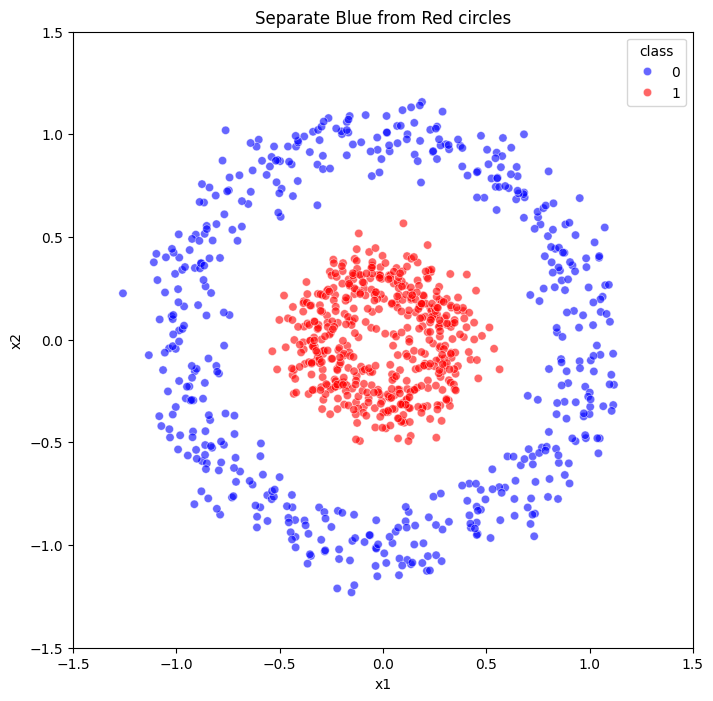

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# 1. Generate the "Circles" data
# factor=0.3 makes the inner circle much smaller than the outer one
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.3, random_state=42)

# 2. Put into a DataFrame for Seaborn
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['class'] = y

# 3. Visualize with Seaborn
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='x1', y='x2', hue='class', palette=['blue', 'red'], alpha=0.6)

plt.title("Separate Blue from Red circles")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

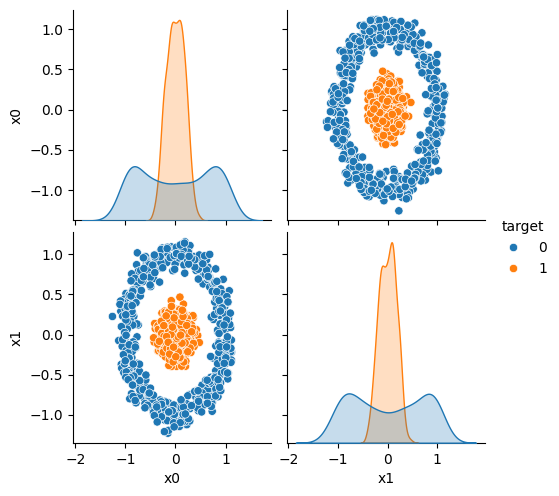

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate synthetic data (circles)
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=42)

# Create a DataFrame
circles = pd.DataFrame({'x0': X[:, 0], 'x1': X[:, 1], 'target': y})

# Plot a pairplot
sns.pairplot(circles, hue="target")
plt.show()

### 1.3 Neural Network Architecture

To solve this problem, we use a neural network.
1.  **Input Layer:** Receives the coordinates.
2.  **Hidden Layer:** Processes features (e.g., 4 neurons, `tanh` activation).
3.  **Output Layer:** Produces the final prediction.

<div style="background: #e0f2fe; border-left: 16px solid #0284c7; padding: 14px 18px; border-radius: 8px; font-size: 18px; color: #075985;"> 💡 <b>Tip:</b> For binary classification, the output layer typically uses the <b>Sigmoid</b> activation function. It transforms the neuron output into a probability between 0 and 1. </div>

**The Sigmoid Function Logic:**
$$ \text{neuron output (3)} \rightarrow \text{sigmoid} \rightarrow \text{transformed output (0.95)} \rightarrow \text{rounded output (1)} $$



### 1.4 Building the Model in Keras

We will use the `Sequential` API from Keras to build the model layer by layer.

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Instantiate a sequential model
model = Sequential()

# Add input and hidden layer
# input_shape=(2,) corresponds to the x and y coordinates
model.add(Dense(4, input_shape=(2,), activation='tanh'))

# Add output layer, use sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Summary of the model
model.summary()

e:\001_Github_Repo_all\applied-deep-learning-keras\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

### 1.5 Compiling, Training, and Predicting

In [25]:
# Compile model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
# Using the 'circles' data 
# X contains coordinates, y contains labels
model.fit(X, y, epochs=20, verbose=1)

# Predict with trained model
preds = model.predict(X)

# Display first 5 predictions
print("First 5 predictions:\n", preds[:5])

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5040 - loss: 0.7077   
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5170 - loss: 0.7050 
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5380 - loss: 0.7028 
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5660 - loss: 0.7007 
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5800 - loss: 0.6988
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5920 - loss: 0.6970
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6140 - loss: 0.6955 
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6240 - loss: 0.6939 
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6380 - loss: 0.6926 
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6430 - loss: 0.6912 
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - loss: 0.6899 
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 

### 1.6 Binary classification(`Breast Cancer` dataset)

In [26]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow import keras
from tensorflow.keras import layers

# Load sklearn dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Keras model
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train model
model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

Epoch 1/20


e:\001_Github_Repo_all\applied-deep-learning-keras\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 - 1s - 81ms/step - accuracy: 0.5355 - loss: 0.7441 - val_accuracy: 0.6739 - val_loss: 0.6328
Epoch 2/20
13/13 - 0s - 8ms/step - accuracy: 0.7335 - loss: 0.5991 - val_accuracy: 0.7826 - val_loss: 0.5371
Epoch 3/20
13/13 - 0s - 8ms/step - accuracy: 0.8484 - loss: 0.5011 - val_accuracy: 0.8261 - val_loss: 0.4671
Epoch 4/20
13/13 - 0s - 8ms/step - accuracy: 0.8826 - loss: 0.4292 - val_accuracy: 0.8478 - val_loss: 0.4054
Epoch 5/20
13/13 - 0s - 8ms/step - accuracy: 0.9120 - loss: 0.3698 - val_accuracy: 0.8696 - val_loss: 0.3521
Epoch 6/20
13/13 - 0s - 8ms/step - accuracy: 0.9291 - loss: 0.3192 - val_accuracy: 0.8913 - val_loss: 0.3088
Epoch 7/20
13/13 - 0s - 8ms/step - accuracy: 0.9340 - loss: 0.2766 - val_accuracy: 0.8913 - val_loss: 0.2705
Epoch 8/20
13/13 - 0s - 9ms/step - accuracy: 0.9413 - loss: 0.2405 - val_accuracy: 0.8913 - val_loss: 0.2420
Epoch 9/20
13/13 - 0s - 8ms/step - accuracy: 0.9511 - loss: 0.2115 - val_accuracy: 0.9130 - val_loss: 0.2180
Epoch 10/20
13/13 - 0s - 8ms/

In [27]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predict
predictions = model.predict(X_test[:5])
print("Probabilities:", predictions)

# Convert probabilities to class labels
class_preds = (predictions > 0.5).astype(int)
print("Predicted Classes:", class_preds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9912 - loss: 0.0747 
Test Accuracy: 0.9912280440330505
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Probabilities: [[0.82253283]
 [0.00705228]
 [0.02716658]
 [0.9775089 ]
 [0.99475664]]
Predicted Classes: [[1]
 [0]
 [0]
 [1]
 [1]]


### 1.7 Binary classification (`Banknotes` dataset)

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load CSV
data = pd.read_csv("_datasets/banknotes.csv")  # replace with correct path
print(data.head())

# Assume the last column is the label
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Keras model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1
)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predict
preds = model.predict(X_test[:5])
print("Predicted Probabilities:", preds)
print("Predicted Classes:", (preds > 0.5).astype(int))

   variace  skewness  curtosis  entropy  class
0  3.62160    8.6661   -2.8073 -0.44699      0
1  4.54590    8.1674   -2.4586 -1.46210      0
2  3.86600   -2.6383    1.9242  0.10645      0
3  3.45660    9.5228   -4.0112 -3.59440      0
4  0.32924   -4.4552    4.5718 -0.98880      0
Epoch 1/20


e:\001_Github_Repo_all\applied-deep-learning-keras\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4995 - loss: 0.7207 - val_accuracy: 0.5000 - val_loss: 0.6898
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5451 - loss: 0.6282 - val_accuracy: 0.5909 - val_loss: 0.6192
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6606 - loss: 0.5658 - val_accuracy: 0.6727 - val_loss: 0.5646
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8430 - loss: 0.5103 - val_accuracy: 0.8273 - val_loss: 0.5133
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8865 - loss: 0.4557 - val_accuracy: 0.8273 - val_loss: 0.4614
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8987 - loss: 0.3992 - val_accuracy: 0.8545 - val_loss: 0.4049
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9179 - loss: 0.3402 - val_accuracy: 0.9000 - val_loss: 0.3475
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9422 - loss: 0.2813 - val_accuracy: 0.9182 - val_loss: 0.2938
Epo

---

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 2. MULTI-CLASS CLASSIFICATION</span><br>

![image](_img\02\01.png)

### 2.1 The Concept

Multi-class classification involves distinguishing between **more than two** classes.
*   **Analogy:** Throwing darts where different regions correspond to different competitors (Steve, Susan, Michael, Kate).
*   **Dataset:** Features (`xCoord`, `yCoord`) and a categorical target (`competitor`).

**Example Dataset:**

| xCoord | yCoord | competitor |
| :--- | :--- | :--- |
| -0.037673 | 0.057402 | Steve |
| -0.331021 | -0.585035 | Susan |
| -0.123567 | 0.839730 | Susan |
| -0.086160 | 0.959787 | Michael |
| -0.902632 | 0.078753 | Michael |

### 2.2 Architecture for Multi-Class

The architecture changes slightly from binary classification:
1.  **Input/Hidden Layers:** Similar structure (e.g., 128 -> 64 -> 32 neurons).
2.  **Output Layer:** The number of neurons **must equal the number of classes**.
3.  **Activation:** We use **Softmax**.

**Softmax Output Example:**
Softmax ensures all output probabilities sum to 1.
- Michael: 0.6
- Susan: 0.1
- Kate: 0.2
- Steve: 0.1
- **Total:** 1.0

### 2.3 Building the Multi-Class Model

In [29]:
# Define a multi-class model
mc_model = Sequential()

# Input layer and first hidden layer
mc_model.add(Dense(128, input_shape=(2,), activation='relu'))

# Additional hidden layers
mc_model.add(Dense(64, activation='relu'))
mc_model.add(Dense(32, activation='relu'))

# Output layer: 4 neurons (for 4 competitors), softmax activation
mc_model.add(Dense(4, activation='softmax'))

mc_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,852 (42.39 KB)

 Trainable params: 10,852 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

### 2.4 Categorical Cross-Entropy

For multi-class problems, the loss function is `categorical_crossentropy`.

In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy')

### 2.5 Preparing the Dataset (One-Hot Encoding)

Neural networks cannot understand text labels like "Steve" or "Susan". We must convert them into numbers.
1.  **Label Encoding:** Assign a number to each category (0, 1, 2, 3).
2.  **One-Hot Encoding:** Create a binary vector for each category.

**One-Hot Encoding Table:**

| Food Name | Categorical # | Calories | $\rightarrow$ | Apple | Chicken | Broccoli | Calories |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| Apple | 1 | 95 | | 1 | 0 | 0 | 95 |
| Chicken | 2 | 231 | | 0 | 1 | 0 | 231 |
| Broccoli | 3 | 50 | | 0 | 0 | 1 | 50 |


In [5]:
import pandas as pd
from tensorflow.keras.utils import to_categorical

# 1. Load the dataset
data = {
    'response': ['Apple', 'Chicken', 'Broccoli', 'Chicken', 'Apple'],
    'calories': [95, 231, 50, 231, 95]
}
df = pd.DataFrame(data)

print("--- Step 1: Original Data ---")
print(df)
print("\n")

# 2. Turn response variable into labeled codes
df['response_code'] = pd.Categorical(df['response']).codes

print("--- Step 2: After Label Encoding ---")
print(df)
print("\n")

# 3. Turn response variable into one-hot response vector
y = to_categorical(df['response_code'])

print("--- Step 3: One-Hot Encoded Result ---")
print(y)

--- Step 1: Original Data ---
   response  calories
0     Apple        95
1   Chicken       231
2  Broccoli        50
3   Chicken       231
4     Apple        95


--- Step 2: After Label Encoding ---
   response  calories  response_code
0     Apple        95              0
1   Chicken       231              2
2  Broccoli        50              1
3   Chicken       231              2
4     Apple        95              0


--- Step 3: One-Hot Encoded Result ---
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


### 2.6 Multi-Class classification (`Iris` dataset)

In [32]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# Load sklearn dataset (3 classes)
data = load_iris()
X = data.data
y = data.target  # classes: 0, 1, 2 [setosa, versicolor, virginica]

# One-hot encode labels
y = to_categorical(y, num_classes=3)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Keras model
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation="relu"),
    layers.Dense(3, activation="softmax")  # 3 classes
])

# Compile model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train model
model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1
)

Epoch 1/30


e:\001_Github_Repo_all\applied-deep-learning-keras\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4259 - loss: 1.0288 - val_accuracy: 0.6667 - val_loss: 0.9814
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4444 - loss: 0.9975 - val_accuracy: 0.6667 - val_loss: 0.9617
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4444 - loss: 0.9683 - val_accuracy: 0.6667 - val_loss: 0.9412
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4444 - loss: 0.9432 - val_accuracy: 0.6667 - val_loss: 0.9208
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4444 - loss: 0.9187 - val_accuracy: 0.6667 - val_loss: 0.9030
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4444 - loss: 0.8952 - val_accuracy: 0.6667 - val_loss: 0.8857
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4537 - loss: 0.8740 - val_accuracy: 0.6667 - val_loss: 0.8694
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4815 - loss: 0.8560 - val_accuracy: 0.6667 - val_loss: 0.8536
Epoch 9/30


In [33]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predict
predictions = model.predict(X_test[:5])
print("Class probabilities:\n", predictions)

# Convert probabilities to class labels
class_preds = np.argmax(predictions, axis=1)
print("Predicted Classes:", class_preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8667 - loss: 0.5095
Test Accuracy: 0.8666666746139526
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Class probabilities:
 [[1.3506474e-01 4.2572546e-01 4.3920988e-01]
 [4.6708253e-01 3.8108465e-01 1.5183273e-01]
 [6.8006793e-04 9.9242307e-02 9.0007758e-01]
 [9.8895587e-02 4.0122998e-01 4.9987444e-01]
 [3.7512802e-02 4.3983480e-01 5.2265245e-01]]
Predicted Classes: [2 0 2 2 2]


---

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 3. MULTI-LABEL CLASSIFICATION</span><br>

![image](_img\02\02.png)

### 3.1 The Concept

In multi-label classification, a single instance can belong to **multiple classes** simultaneously.
- **Example:** A TV show like *Game of Thrones* can be tagged as "Action", "Adventure", AND "Drama".
- **Irrigation Machine Example:** A sensor reading might indicate multiple parcels of land need water simultaneously.

### 3.2 Architecture Differences

- **Multi-Class:** Uses `softmax` (probabilities sum to 1, classes are mutually exclusive).
- **Multi-Label:** Uses `sigmoid` on the output layer. Each neuron outputs a probability between 0 and 1 independently of the others.

**Comparison:**

| Feature | Multi-Class | Multi-Label |
| :--- | :--- | :--- |
| **Example** | Sun OR Moon OR Cloud | Sun AND Cloud |
| **Labels** | [0 0 1] (Only one active) | [1 0 1] (Multiple active) |
| **Activation** | Softmax | Sigmoid |
| **Loss** | Categorical Cross-entropy | Binary Cross-entropy |

### 3.3 Building the Multi-Label Model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Generate dummy multi-label data
# 100 samples, 10 features
X_train = np.random.random((100, 10))
# 100 samples, 3 possible labels (0 or 1 for each)
y_train = np.random.randint(2, size=(100, 3))

# Instantiate model
ml_model = Sequential()

# Add input and hidden layers
ml_model.add(Dense(16, input_shape=(10,), activation='relu'))

# Add an output layer for the 3 classes and sigmoid activation
# Sigmoid allows each output node to independently be close to 0 or 1
ml_model.add(Dense(3, activation='sigmoid'))

# Compile the model with binary crossentropy
ml_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# validation_split creates a validation set automatically
history = ml_model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.1000 - loss: 0.7164 - val_accuracy: 0.0500 - val_loss: 0.7414
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1000 - loss: 0.7132 - val_accuracy: 0.0500 - val_loss: 0.7385
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1000 - loss: 0.7097 - val_accuracy: 0.0500 - val_loss: 0.7358
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1125 - loss: 0.7066 - val_accuracy: 0.0500 - val_loss: 0.7336
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1125 - loss: 0.7044 - val_accuracy: 0.0500 - val_loss: 0.7312
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1125 - loss: 0.7017 - val_accuracy: 0.0500 - val_loss: 0.7293
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1125 - loss: 0.7002 - val_accuracy: 0.1000 - val_loss: 0.7272
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1375 - loss: 0.6983 - val_accuracy: 0.1000 - val_loss: 0.7255

### 3.4 Multi-Label Model (`darts` dataset)

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Load darts.csv
data = pd.read_csv("_datasets/darts.csv")

# Preprocess for Multi-Label (One-Hot Encoding)
data = pd.get_dummies(data, columns=['competitor'], prefix='', prefix_sep='')
data = data.astype(float)
print(data.head())

# Separate features and targets
# xCoord, yCoord are features
X = data[['xCoord', 'yCoord']].values
y = data.drop(['xCoord', 'yCoord'], axis=1).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Keras model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(y.shape[1], activation='sigmoid')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

     xCoord    yCoord  Kate  Michael  Steve  Susan
0  0.196451 -0.520341   0.0      0.0    1.0    0.0
1  0.476027 -0.306763   0.0      0.0    0.0    1.0
2  0.003175 -0.980736   0.0      1.0    0.0    0.0
3  0.294078  0.267566   1.0      0.0    0.0    0.0
4 -0.051120  0.598946   0.0      0.0    1.0    0.0
Epoch 1/30


e:\001_Github_Repo_all\applied-deep-learning-keras\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2448 - loss: 0.6960 - val_accuracy: 0.2969 - val_loss: 0.6827
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2865 - loss: 0.6760 - val_accuracy: 0.2969 - val_loss: 0.6642
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2882 - loss: 0.6557 - val_accuracy: 0.1875 - val_loss: 0.6430
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2691 - loss: 0.6313 - val_accuracy: 0.2031 - val_loss: 0.6193
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2639 - loss: 0.6050 - val_accuracy: 0.2188 - val_loss: 0.5935
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2795 - loss: 0.5792 - val_accuracy: 0.2656 - val_loss: 0.5691
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3264 - loss: 0.5568 - val_accuracy: 0.2969 - val_loss: 0.5490
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3576 - loss: 0.5405 - val_accuracy: 0.3594 - val_loss: 0.5340
Ep

In [36]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predict
preds = model.predict(X_test[:5])
label_preds = (preds > 0.5).astype(int)
print("Predicted Labels:\n", label_preds)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4625 - loss: 0.4356 
Test Accuracy: 0.4625000059604645
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Labels:
 [[0 0 1 0]
 [0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]
 [0 0 1 0]]


### 3.5 Multi-Label Model (`irrigation_machine` dataset)

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Load irrigation_machine.csv
data = pd.read_csv("_datasets/irrigation_machine.csv")
print(data.head())

# Assuming last N columns are multi-label targets
num_labels = 4  # change according to dataset
X = data.iloc[:, :-num_labels].values
y = data.iloc[:, -num_labels:].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Keras model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(y.shape[1], activation='sigmoid')  # multi-label output
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

   Unnamed: 0  sensor_0  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
0           0       1.0       2.0       1.0       7.0       0.0       1.0   
1           1       5.0       1.0       3.0       5.0       2.0       2.0   
2           2       3.0       1.0       4.0       3.0       4.0       0.0   
3           3       2.0       2.0       4.0       3.0       5.0       0.0   
4           4       4.0       3.0       3.0       2.0       5.0       1.0   

   sensor_6  sensor_7  sensor_8  ...  sensor_13  sensor_14  sensor_15  \
0       1.0       4.0       0.0  ...        8.0        1.0        0.0   
1       1.0       2.0       3.0  ...        4.0        5.0        5.0   
2       1.0       6.0       0.0  ...        3.0        3.0        1.0   
3       3.0       2.0       2.0  ...        4.0        1.0        1.0   
4       3.0       1.0       1.0  ...        1.0        3.0        2.0   

   sensor_16  sensor_17  sensor_18  sensor_19  parcel_0  parcel_1  parcel_2  
0        2.0        

e:\001_Github_Repo_all\applied-deep-learning-keras\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5708 - loss: 0.5445 - val_accuracy: 0.8875 - val_loss: -0.0460
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8076 - loss: -0.3046 - val_accuracy: 0.9000 - val_loss: -1.2502
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8076 - loss: -1.6235 - val_accuracy: 0.9000 - val_loss: -3.7273
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8076 - loss: -4.5557 - val_accuracy: 0.9000 - val_loss: -9.1988
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8076 - loss: -10.7773 - val_accuracy: 0.9000 - val_loss: -20.3167
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8076 - loss: -22.6967 - val_accuracy: 0.9000 - val_loss: -40.2474
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8076 - loss: -43.2942 - val_accuracy: 0.9000 - val_loss: -72.8440
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8076 - loss: -74.9468 - val_accuracy: 0.9000 -

In [38]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predict
preds = model.predict(X_test[:5])
label_preds = (preds > 0.5).astype(int)
print("Predicted Labels:\n", label_preds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: -8683.3096  
Test Accuracy: 0.8125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Labels:
 [[1 1 0 0]
 [1 1 0 0]
 [1 1 1 0]
 [1 1 1 0]
 [1 1 0 0]]


---

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 4. KERAS CALLBACKS</span><br>

### 4.1 What is a Callback?

A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training.

### 4.2 The History Callback

The `fit()` method returns a `History` object. This object has a member `history`, which is a dictionary containing data about everything that happened during training.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


e:\001_Github_Repo_all\applied-deep-learning-keras\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Starting training...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9270 - loss: 0.2569 - val_accuracy: 0.9608 - val_loss: 0.1333
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9661 - loss: 0.1149 - val_accuracy: 0.9710 - val_loss: 0.0973
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9768 - loss: 0.0787 - val_accuracy: 0.9722 - val_loss: 0.0879
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9817 - loss: 0.0597 - val_accuracy: 0.9766 - val_loss: 0.0780
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9861 - loss: 0.0453 - val_accuracy: 0.9773 - val_loss: 0.0725

Keys in history: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


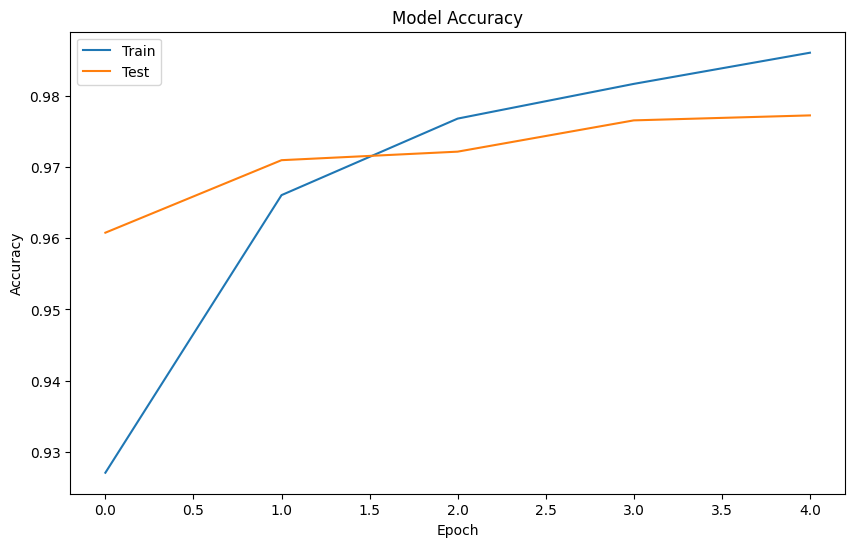

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. PREPARE DATA
# Loading a sample dataset (MNIST)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# 2. BUILD MODEL
# A simple neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. TRAIN AND SAVE HISTORY 
# We assign the result of model.fit to a variable named 'history'.
# We MUST provide validation_data to get 'val_loss' and 'val_accuracy'.
print("Starting training...")
history = model.fit(X_train, y_train, 
                    epochs=5, 
                    validation_data=(X_test, y_test))

# 4. INSPECT THE DICTIONARY
# This prints the keys available, matching your second slide
print("\nKeys in history:", history.history.keys())

# 5. PLOT THE RESULTS (Matching your third slide)
plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.plot(history.history['accuracy'])
# Plot validation accuracy
plt.plot(history.history['val_accuracy'])

# Make it pretty
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Show the plot
plt.show()

### 4.3 Early Stopping

Early stopping is a technique to prevent overfitting. It stops training when a monitored metric (like validation loss) has stopped improving.

<div style="background: #e0f2fe; border-left: 16px solid #0284c7; padding: 14px 18px; border-radius: 8px; font-size: 18px; color: #075985;"> 💡 <b>Tip:</b> The `patience` parameter determines how many epochs to wait after the metric stops improving before actually stopping the training. </div>


### 4.4 Model Checkpoint

- `ModelCheckpoint` saves the model at some interval, so the model can be loaded later to continue training from the state saved. 

- `save_best_only=True` ensures you only save the model when it performs better than previous epochs.

> `EarlyStopping`, `ModelCheckpoint` -> demonstration

In [10]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1. PREPARE DATA (Same as before)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# 2. BUILD MODEL
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. DEFINE CALLBACKS (Matching your slide)

# EarlyStopping: Stop if validation loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=3, 
                               verbose=1)

# ModelCheckpoint: Save the BEST model to a file
# We use .keras as it is the modern standard, but .hdf5 works too
model_checkpoint = ModelCheckpoint('best_model.keras', 
                                   monitor='val_loss', 
                                   save_best_only=True,
                                   verbose=0)

# 4. TRAIN WITH CALLBACKS
print("Starting training... (Notice it will stop before 50 epochs)")
history = model.fit(X_train, y_train, 
                    epochs=5,  # Set high to demonstrate early stopping
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, model_checkpoint]) 

print("\nTraining finished.")

Starting training... (Notice it will stop before 50 epochs)
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9269 - loss: 0.2585 - val_accuracy: 0.9572 - val_loss: 0.1369
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9668 - loss: 0.1108 - val_accuracy: 0.9705 - val_loss: 0.0975
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9762 - loss: 0.0778 - val_accuracy: 0.9741 - val_loss: 0.0874
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9823 - loss: 0.0576 - val_accuracy: 0.9755 - val_loss: 0.0774
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9860 - loss: 0.0456 - val_accuracy: 0.9774 - val_loss: 0.0728

Training finished.


### 4.5 Loading the saved model

This restores the `architecture`, `weights`, and `optimizer state` exactly as they were at the "best" epoch.

Model loaded successfully!
Restored model overall accuracy: 97.74%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


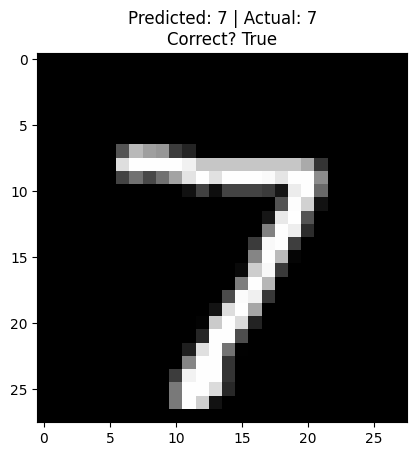

Success!7.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# 0. SETUP: LOAD DATA (Required for X_test and y_test to exist)
(_, _), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_test = X_test / 255.0  # Normalize just like we did during training

# ---------------------------------------------------------
# PART 1: LOAD AND EVALUATE MODEL
# ---------------------------------------------------------

# Load the saved model file
# Ensure 'best_model.keras' exists in your current directory
saved_model = load_model('best_model.keras')
print("Model loaded successfully!")

# Evaluate the model on the entire test set
loss, accuracy = saved_model.evaluate(X_test, y_test, verbose=0)
print(f"Restored model overall accuracy: {accuracy*100:.2f}%")

# ---------------------------------------------------------
# PART 2: VISUALIZE A SINGLE PREDICTION
# ---------------------------------------------------------

# 1. Pick a random image from the test set
image_index = 0  
test_image = X_test[image_index]
true_label = y_test[image_index]

# 2. Ask model to predict
# We reshape the image to (1, 28, 28) because the model expects a batch
prediction_probabilities = saved_model.predict(test_image.reshape(1, 28, 28))

# 3. Interpret the result
# np.argmax finds the index of the highest probability
predicted_label = np.argmax(prediction_probabilities)


# 4. Visualize it
plt.imshow(test_image, cmap='gray')
plt.title(f"Predicted: {predicted_label} | Actual: {true_label}\nCorrect? {is_correct}")
# plt.axis('off')  # Hide axes for a cleaner look
plt.show()

# 5. Check if correct
is_correct = (predicted_label == true_label)

# Simple text output
if is_correct:
    print(f"Success!{predicted_label}.")
else:
    print(f"Fail!- predicted label {predicted_label}, ground truth {true_label}.")

### 4.6 Multi-Class classification (`Iris` dataset) ~ **Callbacks** -> `EarlyStopping`, `ModelCheckpoint` and `ReduceLROnPlateau`

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2166 - loss: 2.3206 - val_accuracy: 0.4861 - val_loss: 1.8243 - learning_rate: 0.0010
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5321 - loss: 1.6129 - val_accuracy: 0.8333 - val_loss: 1.1811 - learning_rate: 0.0010
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7332 - loss: 1.1370 - val_accuracy: 0.8889 - val_loss: 0.7405 - learning_rate: 0.0010
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8128 - loss: 0.8225 - val_accuracy: 0.9514 - val_loss: 0.5168 - learning_rate: 0.0010
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8724 - loss: 0.6322 - val_accuracy: 0.9653 - val_loss: 0.3950 - learning_rate: 0.0010
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8755 - loss: 0.5433 - val_accuracy: 0.9583 - val_loss: 0.3265 - learning_rate: 0.0010
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8995 - loss: 0.4690 - val_accuracy:

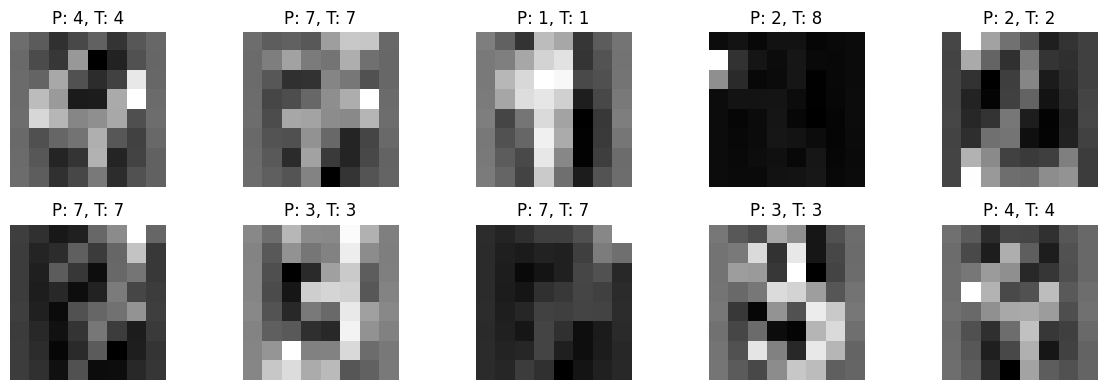

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# -----------------------------
# Load Digits dataset
# -----------------------------
X = np.load("_datasets/Digits/digits_pixels.npy")
y = np.load("_datasets/Digits/digits_target.npy")

num_classes = len(np.unique(y))
y = to_categorical(y, num_classes=num_classes)

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Feature scaling
# -----------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# Build Keras model
# -----------------------------
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation="softmax")
])

# -----------------------------
# Compile model
# -----------------------------
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# -----------------------------
# Callbacks
# -----------------------------
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_digits_model.keras', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

# -----------------------------
# Train model
# -----------------------------
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

# -----------------------------
# Load the best saved model
# -----------------------------
print("\n--- Loading best model from checkpoint ---")
best_model = keras.models.load_model('best_digits_model.keras')

# -----------------------------
# Evaluate the loaded model
# -----------------------------
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# -----------------------------
# Predict on first 10 test samples
# -----------------------------
predictions = best_model.predict(X_test[:10])
class_preds = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:10], axis=1)

print("Predicted Classes:", class_preds)
print("True Classes     :", true_classes)

# -----------------------------
# Visualize predictions
# -----------------------------
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"P: {class_preds[i]}, T: {true_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

**Why `.keras` is Better Than `.h5`**

The `.keras` format offers several advantages:
- Name-based saving: Ensures what you load is exactly what you saved from Python's perspective
- More efficient: It's a zip archive containing model architecture, weights, and training configuration
- Easier debugging: The name-based approach makes troubleshooting more straightforward
- Current standard: TensorFlow/Keras officially recommends this format for new projects
- The .h5 format is now considered legacy and will trigger warnings in newer versions.

---

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 5. CONCLUSION</span><br>



### **1. Binary Classification**

* **Use case:** 2 classes (e.g., spam vs. not spam)
* **Model output:**  = `1 neuron`
* **Activation:** `sigmoid`
* **Loss function:** `binary_crossentropy`
* **Metrics:** `accuracy`, `AUC`

```python
model = Sequential([
    Dense(16, activation='relu', input_shape=(input_dim,)),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
```

---

### **2. Multi-Class Classification**

* **Use case:** >2 mutually exclusive classes (e.g., digit recognition 0–9)
* **Model output:** `Number of neurons = number of classes`
* **Activation:** `softmax`
* **Loss function:** `categorical_crossentropy`
* **Data prep:** One-hot encode labels (`to_categorical`)
* **Metrics:** `accuracy`

```python
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes)
```

---

### **3. Multi-Label Classification**

* **Use case:** Items can belong to multiple classes (e.g., image tagging)
* **Model output:** Number of neurons = number of possible labels
* **Activation:** `sigmoid` (per neuron)
* **Loss function:** `binary_crossentropy`
* **Metrics:** `accuracy`, `AUC`

---

### **4. Callbacks**

* **`History`** – Logs training & validation metrics for plotting
* **`EarlyStopping`** – Stop training when validation loss stops improving
* **`ModelCheckpoint`** – Save the best model during training
* **`ReduceLROnPlateau`** – Reduce learning rate when metrics plateau

```python
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]
```

---

### **5. Common Optimizers**

| Optimizer | Key Notes                                      |
| --------- | ---------------------------------------------- |
| SGD       | Basic, allows momentum and learning rate decay |
| Adam      | Adaptive learning rates, widely used           |
| RMSprop   | Good for RNNs or online learning               |
| Adagrad   | Good for sparse data                           |

---

### **6. Common Activation Functions**

| Activation | Use Case                                  |
| ---------- | ----------------------------------------- |
| ReLU       | Hidden layers, most common                |
| Sigmoid    | Binary classification output              |
| Softmax    | Multi-class output                        |
| Tanh       | Hidden layers, sometimes better than ReLU |

---

### **7. Metrics Overview**

* **Accuracy** – Correct predictions / total
* **Precision / Recall / F1-score** – Important for imbalanced datasets
* **AUC-ROC** – Probability ranking quality

---

### **8. Data Preprocessing Tips**

* **Normalization:** `x = (x - mean) / std` or `x = x / 255` for images
* **One-Hot Encoding:** For multi-class classification
* **Train/Validation Split:** `train_test_split` or `validation_split` in `model.fit`

---

### **9. Training Tips**

* Start simple → few layers, small neurons
* Use dropout to prevent overfitting
* Monitor training vs. validation loss for overfitting signs
* Batch size: 32–128 (common), tune for your dataset
* Epochs: Start small (10–50), use EarlyStopping

---

### **10. Next Steps / Experiments**

* Try datasets: `MNIST`, `CIFAR-10`, `IMDB  `, `Titanic`
* Experiment with different hidden layers & neurons
* Try different optimizers and learning rates
* Apply regularization (`Dropout`, `L2`)
* Explore pretrained models (`Transfer Learning`)